In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions

In [3]:
from keras.preprocessing import image


In [4]:
classifier = VGG16()

In [5]:
classifier.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

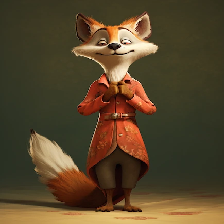

In [6]:
# Load a New Image & Classify the image :
new_img = image.image_utils.load_img("./test_data/ai-image-generator-two.webp",target_size=(224,224))
new_img

In [7]:
# changing the image to array for processing the image:
transform_img = image.image_utils.img_to_array(new_img)
transform_img.shape

(224, 224, 3)

In [8]:
# For VGG16 to work with images for further processing it should be 4 dimensional : Expand the dimension of the image

In [9]:
expand_dim_img = np.expand_dims(transform_img,axis=0)
expand_dim_img.shape

(1, 224, 224, 3)

In [10]:
# Process the image for VGG16 input :
transformed_img = preprocess_input(expand_dim_img)
transformed_img

array([[[[-72.939   , -69.779   , -76.68    ],
         [-72.939   , -69.779   , -76.68    ],
         [-72.939   , -69.779   , -76.68    ],
         ...,
         [-74.939   , -70.779   , -73.68    ],
         [-75.939   , -70.779   , -76.68    ],
         [-75.939   , -70.779   , -76.68    ]],

        [[-72.939   , -69.779   , -76.68    ],
         [-72.939   , -69.779   , -76.68    ],
         [-72.939   , -69.779   , -76.68    ],
         ...,
         [-74.939   , -70.779   , -73.68    ],
         [-74.939   , -69.779   , -74.68    ],
         [-74.939   , -69.779   , -74.68    ]],

        [[-72.939   , -69.779   , -76.68    ],
         [-72.939   , -69.779   , -76.68    ],
         [-72.939   , -69.779   , -76.68    ],
         ...,
         [-74.939   , -70.779   , -73.68    ],
         [-74.939   , -69.779   , -74.68    ],
         [-74.939   , -69.779   , -74.68    ]],

        ...,

        [[-36.939003,  12.221001,  45.32    ],
         [-36.939003,  12.221001,  45.32    ]

In [11]:
# Y predict :
y_predict = classifier.predict(transformed_img)


1/1 [==============================] - 1s 554ms/step


In [12]:
y_predict.shape

(1, 1000)

In [13]:
decode_predict = decode_predictions(y_predict,top=10)

In [14]:
decode_predict

[[('n02119022', 'red_fox', 0.15465926),
  ('n01833805', 'hummingbird', 0.0479999),
  ('n02124075', 'Egyptian_cat', 0.045222852),
  ('n02120505', 'grey_fox', 0.032008406),
  ('n02119789', 'kit_fox', 0.030429492),
  ('n03944341', 'pinwheel', 0.029510748),
  ('n04380533', 'table_lamp', 0.02827392),
  ('n02883205', 'bow_tie', 0.025197206),
  ('n03598930', 'jigsaw_puzzle', 0.023780547),
  ('n03908714', 'pencil_sharpener', 0.022764463)]]

In [15]:
decode_label = decode_predict[0][0]

In [16]:
print(f"Prediction - \n Label = {decode_label[1]} : {(decode_label[2]*100):1f}%.")

Prediction - 
 Label = red_fox : 15.465926%.


In [17]:
# Initialize a user denfine model :
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [18]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
model_user = Sequential()

In [20]:
# Interate all layers of the VGG16 model :
# classifier.layers[-1].name


for i in classifier.layers:
  print(i.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [21]:
for layer in classifier.layers :
  if layer !=  classifier.layers[-1] :
    print(layer.name)
    model_user.add(layer)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2


In [22]:
model_user.layers[-1].name

'fc2'

In [23]:
# Freeze the layers of the new model using trainable parameter = False

In [24]:
for layer in model_user.layers :
  layer.trainable = False

In [25]:
model_user.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [26]:
# Add one Dense layer of node = 1 & activation = "Sigmoid":


In [27]:
model_user.add(Dense(units=1,activation='relu'))

In [28]:
model_user.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [29]:
# Compile the model :


In [30]:
model_user.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
# Prepare the training and Testing Data and do Pre-processing on it :
from keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
traing_data = train_datagen.flow_from_directory(directory='./dog_vs_cats_new/train',target_size=(224,224),batch_size=32,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [34]:
testing_data = test_datagen.flow_from_directory(directory="./dog_vs_cats_new/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [35]:
# Fit the model with data : Training 

In [ ]:
history = model_user.fit(traing_data,epochs=2,steps_per_epoch=500,validation_data=testing_data,validation_steps=100,shuffle=False)

Epoch 1/2
230/500 [============>.................] - ETA: 32:07 - loss: 7.6233 - accuracy: 0.5035